Load the Data

In [ ]:
import yfinance as yf
import pandas as pd

# Define ticker for Coca-Cola
ticker = 'KO'

# Define date range
start_date = '2018-01-01'
end_date = '2024-12-31'

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows
print(data.head())




/tmp/ipython-input-1-3122903004.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker             KO         KO         KO         KO        KO
Date                                                            
2018-01-02  36.016136  36.332482  35.992408  36.308757  10872200
2018-01-03  35.937050  36.134767  35.857964  35.976596  12635600
2018-01-04  36.443218  36.553939  35.944970  36.031966  12709400
2018-01-05  36.435291  36.538105  36.213849  36.395748  13113100
2018-01-08  36.379936  36.459022  36.285033  36.340393   7068600


Data Pre-Processing

In [ ]:
# Check data types and missing values
print(data.info())

# Check for any null values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2018-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Close, KO)   1760 non-null   float64
 1   (High, KO)    1760 non-null   float64
 2   (Low, KO)     1760 non-null   float64
 3   (Open, KO)    1760 non-null   float64
 4   (Volume, KO)  1760 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 82.5 KB
None
Price   Ticker
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64


In [ ]:
# Flatten column MultiIndex
data.columns = [col[0] for col in data.columns]


In [ ]:
data.rename(columns={
    'Close': 'KO_Close',
    'Open': 'KO_Open',
    'High': 'KO_High',
    'Low': 'KO_Low',
    'Volume': 'KO_Volume'
}, inplace=True)


In [ ]:
print(data.head())
print(data.columns)


             KO_Close    KO_High     KO_Low    KO_Open  KO_Volume
Date                                                             
2018-01-02  36.016136  36.332482  35.992408  36.308757   10872200
2018-01-03  35.937050  36.134767  35.857964  35.976596   12635600
2018-01-04  36.443218  36.553939  35.944970  36.031966   12709400
2018-01-05  36.435291  36.538105  36.213849  36.395748   13113100
2018-01-08  36.379936  36.459022  36.285033  36.340393    7068600
Index(['KO_Close', 'KO_High', 'KO_Low', 'KO_Open', 'KO_Volume'], dtype='object')


In [ ]:
close_data = data[['KO_Close']].copy()


visualize the data after the pre-processing steps

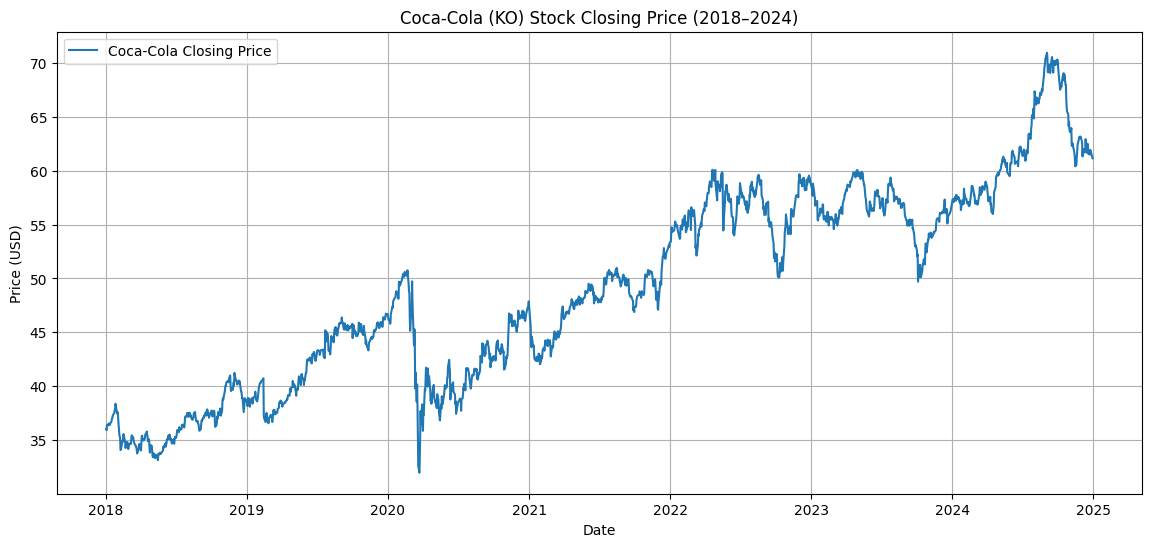

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(close_data, label='Coca-Cola Closing Price')
plt.title('Coca-Cola (KO) Stock Closing Price (2018–2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


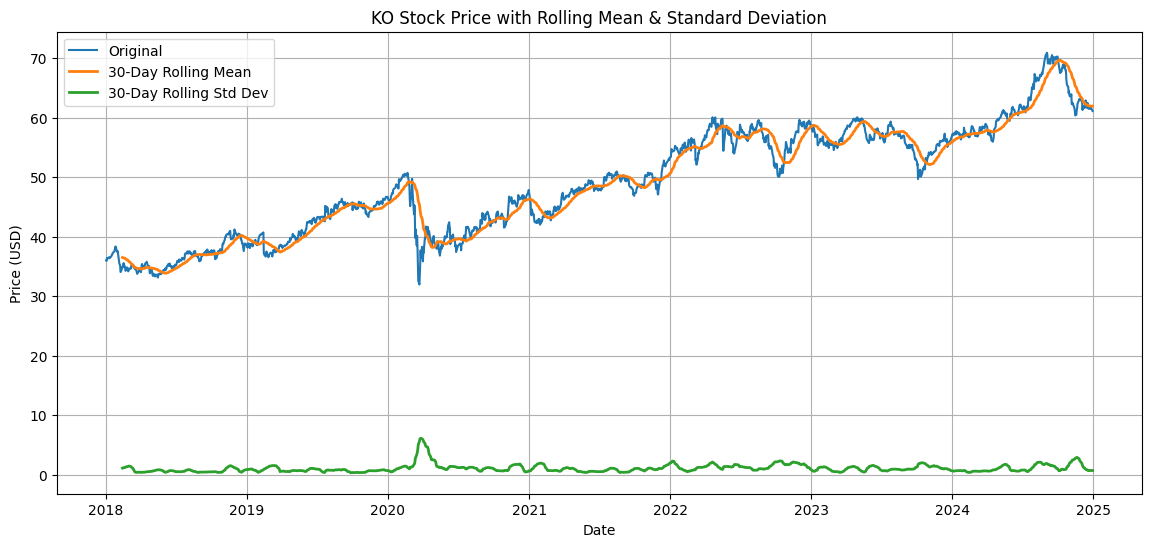

In [ ]:
rolling_mean = data['KO_Close'].rolling(window=30).mean()
rolling_std = data['KO_Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(data['KO_Close'], label='Original')
plt.plot(rolling_mean, label='30-Day Rolling Mean', linewidth=2)
plt.plot(rolling_std, label='30-Day Rolling Std Dev', linewidth=2)
plt.title('KO Stock Price with Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Implement the ARIMA model and fit it

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Download KO data
data = yf.download('KO', start='2018-01-01', end='2024-12-31')
data = data[['Close']]
data.rename(columns={'Close': 'KO_Close'}, inplace=True)
data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Perform Augmented Dickey-Fuller test
result = adfuller(data['KO_Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.40551409579395
p-value: 0.5796297553179827


In [ ]:
# Apply 1st order differencing
data_diff = data['KO_Close'].diff().dropna()

# ADF test again
result = adfuller(data_diff)
print('After differencing - ADF Statistic:', result[0])
print('After differencing - p-value:', result[1])


After differencing - ADF Statistic: -12.959543073659693
After differencing - p-value: 3.2470843482400966e-24


In [ ]:
# Fit ARIMA model
model = ARIMA(data['KO_Close'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                     KO   No. Observations:                 1760
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1509.130
Date:                Wed, 30 Jul 2025   AIC                           3024.260
Time:                        04:36:34   BIC                           3040.678
Sample:                             0   HQIC                          3030.327
                               - 1760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9272      0.035    -26.773      0.000      -0.995      -0.859
ma.L1          0.9507      0.031     30.552      0.000       0.890       1.012
sigma2         0.3256      0.005     61.206      0.0

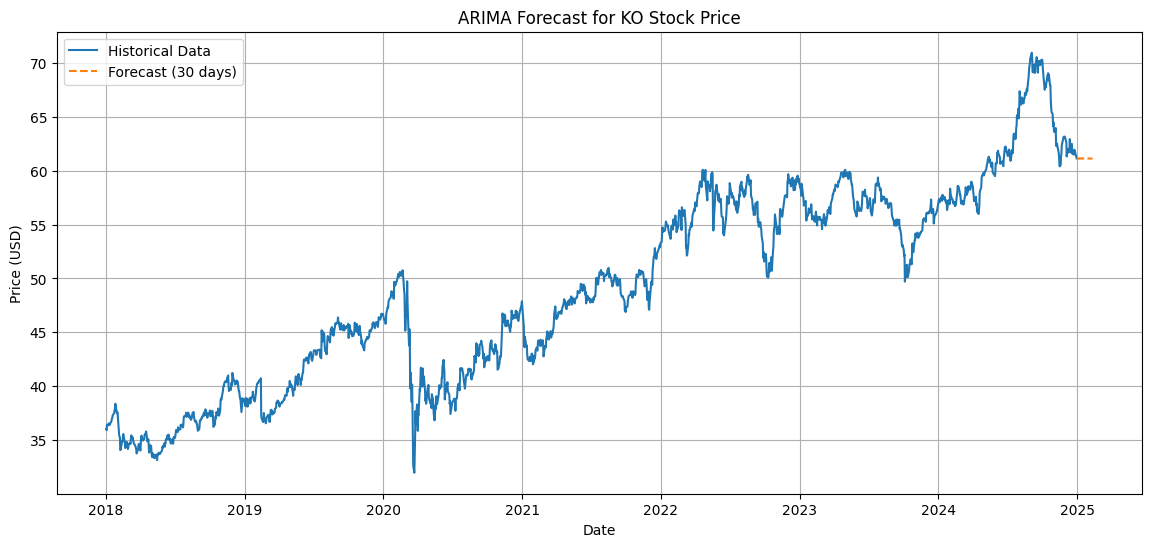

In [ ]:
# Forecast next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create future date range
last_date = data.index[-1]
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='B')[1:]

# Plot actual vs forecast
plt.figure(figsize=(14, 6))
plt.plot(data['KO_Close'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast (30 days)', linestyle='--')
plt.title('ARIMA Forecast for KO Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Implement the SARIMA model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Download KO stock data
data = yf.download('KO', start='2018-01-01', end='2024-12-31')
data = data[['Close']]
data.rename(columns={'Close': 'KO_Close'}, inplace=True)
data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Fit SARIMA model
model_sarima = SARIMAX(data['KO_Close'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 5),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = model_sarima.fit()
print(sarima_result.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                KO   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -1513.037
Date:                           Wed, 30 Jul 2025   AIC                           3036.075
Time:                                   04:37:54   BIC                           3063.403
Sample:                                        0   HQIC                          3046.178
                                          - 1760                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3298      0.443     -0.745      0.456      -1.197       0.538
ma.L1          0.3046      0.449      0.678

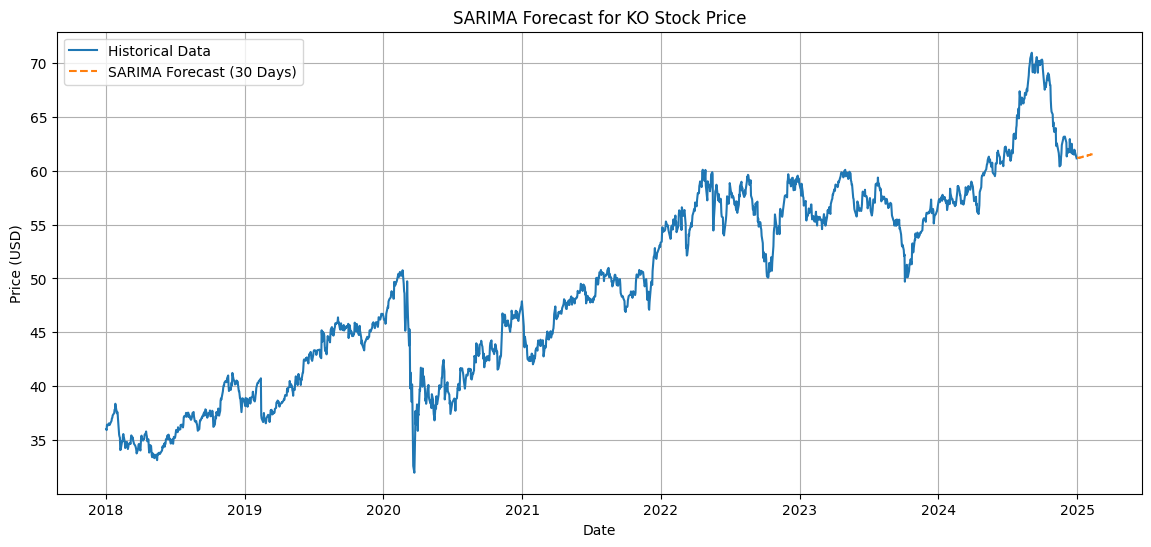

In [ ]:
# Forecasting next 30 days
forecast_steps = 30
forecast_sarima = sarima_result.forecast(steps=forecast_steps)

# Create future dates
last_date = data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='B')[1:]

# Plot actual vs forecast
plt.figure(figsize=(14, 6))
plt.plot(data['KO_Close'], label='Historical Data')
plt.plot(forecast_dates, forecast_sarima, label='SARIMA Forecast (30 Days)', linestyle='--')
plt.title('SARIMA Forecast for KO Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Implementing the prophet model


In [ ]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Download Coca-Cola stock data
data = yf.download('KO', start='2018-01-01', end='2024-12-31')

# Step 2: Select and reset index
df = data[['Close']].reset_index()

# Step 3: Rename columns for Prophet
df.columns = ['ds', 'y']  # 'ds' = date, 'y' = value to forecast

# Step 4: Make sure 'ds' is datetime and 'y' is numeric
df['ds'] = pd.to_datetime(df['ds'])   # Convert date column
df['y'] = pd.to_numeric(df['y'], errors='coerce')  # Ensure numeric

# Step 5: Drop any missing values
df.dropna(inplace=True)

# Check the result
print(df.head())
print(df.dtypes)


[*********************100%***********************]  1 of 1 completed

          ds          y
0 2018-01-02  36.016136
1 2018-01-03  35.937050
2 2018-01-04  36.443218
3 2018-01-05  36.435291
4 2018-01-08  36.379936
ds    datetime64[ns]
y            float64
dtype: object


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwvids_z/uvkjzyxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwvids_z/ddqaofdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=832', 'data', 'file=/tmp/tmpjwvids_z/uvkjzyxn.json', 'init=/tmp/tmpjwvids_z/ddqaofdl.json', 'output', 'file=/tmp/tmpjwvids_z/prophet_modelxeuzuxxw/prophet_model-20250730043855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


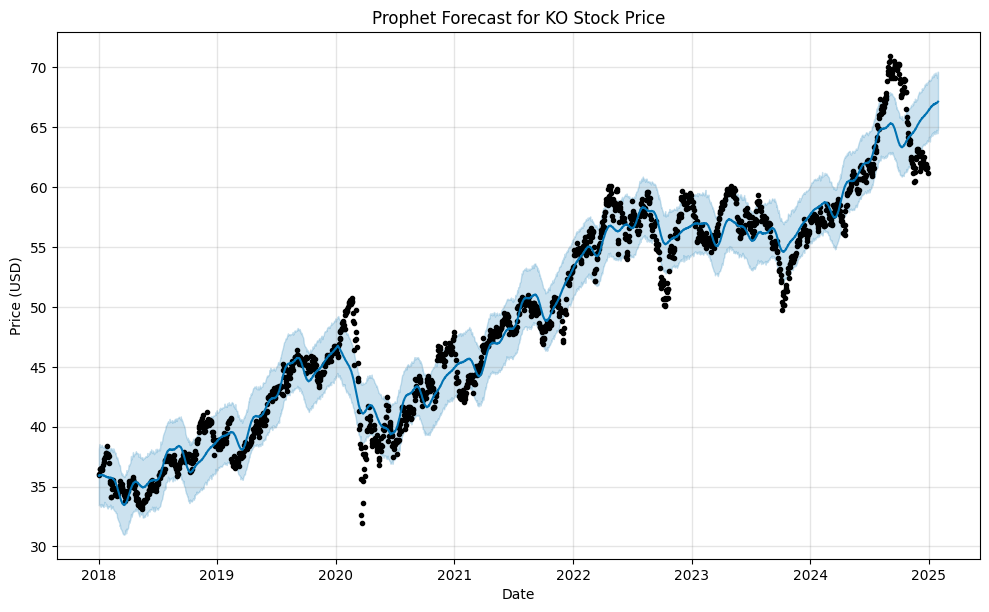

In [ ]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)
plt.title('Prophet Forecast for KO Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()



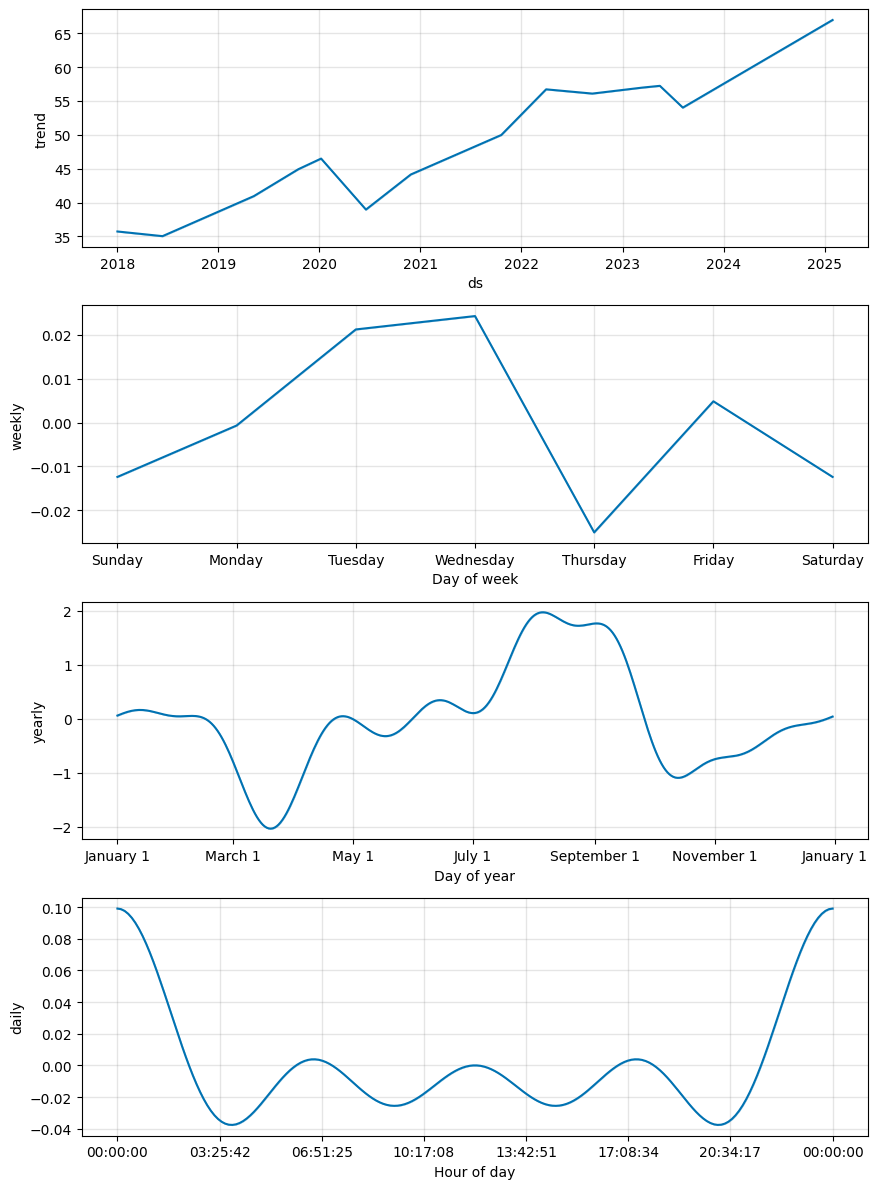

In [ ]:
model.plot_components(forecast)
plt.show()


Implement the LSTM model


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
# Download data
data = yf.download('KO', start='2018-01-01', end='2024-12-31')
data = data[['Close']]

# Normalize prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Set sequence length (e.g., 60 previous days to predict the next)
sequence_len = 60
X = []
y = []

for i in range(sequence_len, len(scaled_data)):
    X.append(scaled_data[i-sequence_len:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)


[*********************100%***********************]  1 of 1 completed


In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=42)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0609
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0054
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0029
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0031
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0028
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0028
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0027
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0024
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0025
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0024
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0024
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0022
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0021
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0022
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0022
Epo

In [ ]:
# Predict
predicted = model.predict(X_test)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


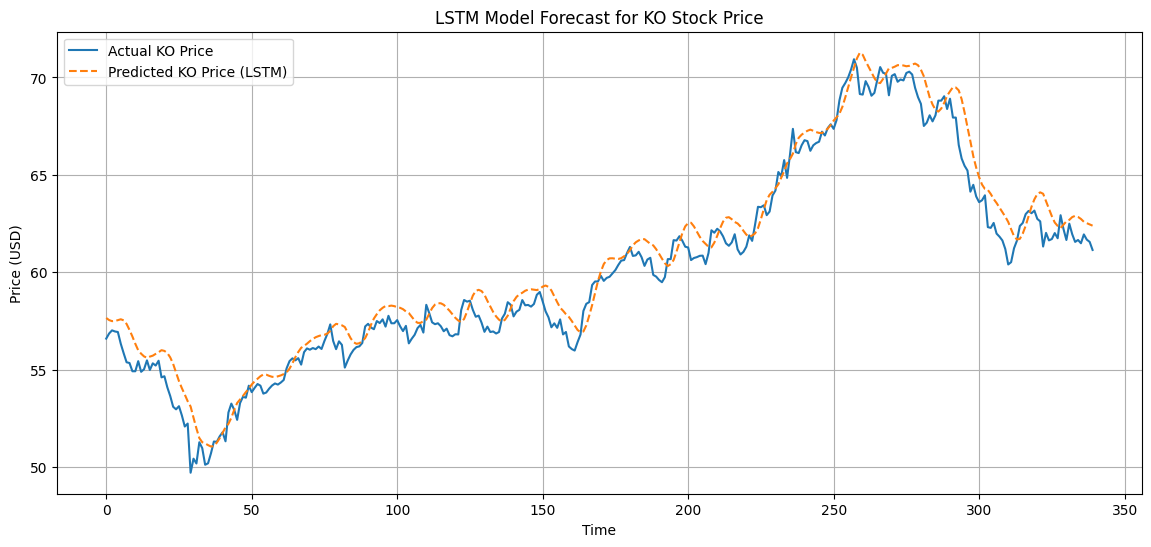

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(actual_prices, label='Actual KO Price')
plt.plot(predicted_prices, label='Predicted KO Price (LSTM)', linestyle='--')
plt.title('LSTM Model Forecast for KO Stock Price')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Use the last 60 days from the original scaled data
last_60_days = scaled_data[-60:]

# Reshape for LSTM input
future_input = last_60_days.reshape(1, -1)  # shape = (1, 60)
future_input = list(future_input[0])        # convert to list

future_predictions = []

for i in range(30):
    # Get the last 60 values and reshape to (1, 60, 1)
    input_sequence = np.array(future_input[-60:]).reshape(1, 60, 1)

    # Predict next day
    next_pred = model.predict(input_sequence, verbose=0)

    # Append prediction and update input
    future_predictions.append(next_pred[0, 0])
    future_input.append(next_pred[0, 0])

# Convert predictions from [0,1] to actual prices
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_prices = scaler.inverse_transform(future_predictions)


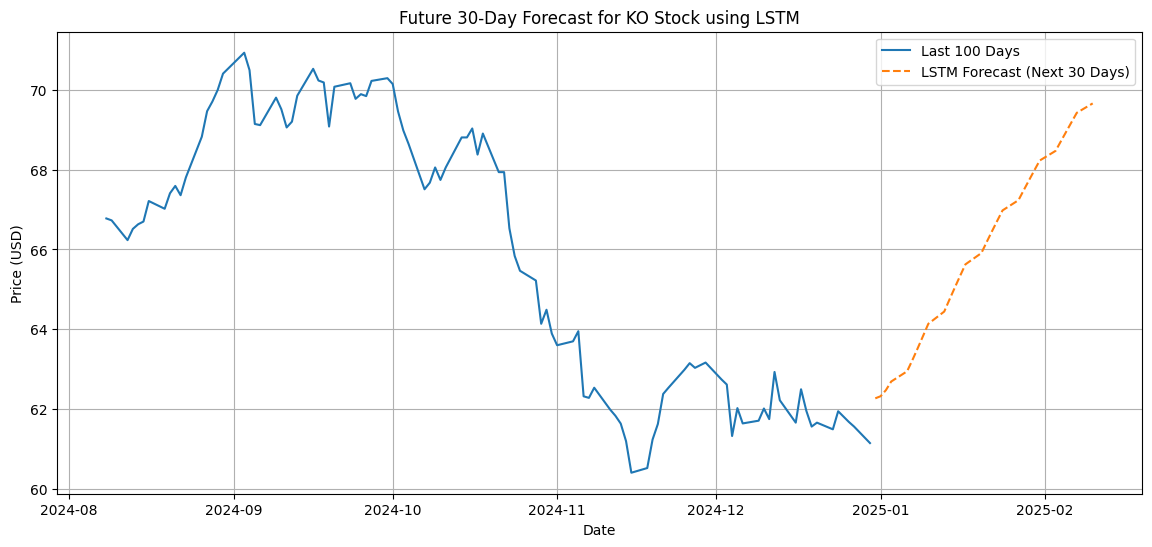

In [ ]:
# Generate future business dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Plot
plt.figure(figsize=(14,6))
plt.plot(data.index[-100:], data['Close'].tail(100), label='Last 100 Days')
plt.plot(future_dates, future_prices, label='LSTM Forecast (Next 30 Days)', linestyle='--')
plt.title('Future 30-Day Forecast for KO Stock using LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Comparing the model

In [ ]:
split = int(len(data) * 0.8)
test_data = data['Close'][split:].values  # real closing prices for testing


In [ ]:
# Assuming ARIMA was trained on full data, and you forecasted len(test_data) steps
pred_arima = model_fit.forecast(steps=len(test_data)).values


In [ ]:
# SARIMA forecast (make sure it matches test size)
pred_sarima = sarima_result.forecast(steps=len(test_data)).values


In [ ]:
# Prophet prediction from the full future DataFrame
# Get only the matching last len(test_data) rows
pred_prophet = forecast['yhat'][-len(test_data):].values


In [ ]:
# Already predicted using LSTM and scaled back
# predicted_prices is the inverse-transformed LSTM prediction
pred_lstm = predicted_prices.reshape(-1)  # if needed, flatten


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return rmse, mae, mape

# Align lengths
min_len = len(pred_lstm)
actual = test_data[:min_len]
pred_arima = pred_arima[:min_len]
pred_sarima = pred_sarima[:min_len]
pred_prophet = pred_prophet[:min_len]
pred_lstm = pred_lstm[:min_len]

# Print lengths to debug
print(f"Length of actual data: {len(actual)}")
print(f"Length of ARIMA predictions: {len(pred_arima)}")
print(f"Length of SARIMA predictions: {len(pred_sarima)}")
print(f"Length of Prophet predictions: {len(pred_prophet)}")
print(f"Length of LSTM predictions: {len(pred_lstm)}")


# Store metrics
metrics = {
    'ARIMA': evaluate_model(actual, pred_arima),
    'SARIMA': evaluate_model(actual, pred_sarima),
    'Prophet': evaluate_model(actual, pred_prophet),
    'LSTM': evaluate_model(actual, pred_lstm)
}

# Print metrics
print(f"\n{'Model':<10} {'RMSE':<10} {'MAE':<10} {'MAPE (%)':<10}")
for model, (rmse, mae, mape) in metrics.items():
    print(f"{model:<10} {rmse:<10.4f} {mae:<10.4f} {mape:<10.2f}")

# Best model
best_model = min(metrics.items(), key=lambda x: x[1][0])  # Lowest RMSE
print(f"\n✅ Best Forecasting Model: {best_model[0]} (Lowest RMSE: {best_model[1][0]:.4f})")

Length of actual data: 340
Length of ARIMA predictions: 340
Length of SARIMA predictions: 340
Length of Prophet predictions: 340
Length of LSTM predictions: 340

Model      RMSE       MAE        MAPE (%)  
ARIMA      5.2300     4.4102     7.47      
SARIMA     5.3864     4.8786     9.59      
Prophet    3.2517     2.8085     8.82      
LSTM       1.8761     1.5301     9.64      

✅ Best Forecasting Model: LSTM (Lowest RMSE: 1.8761)


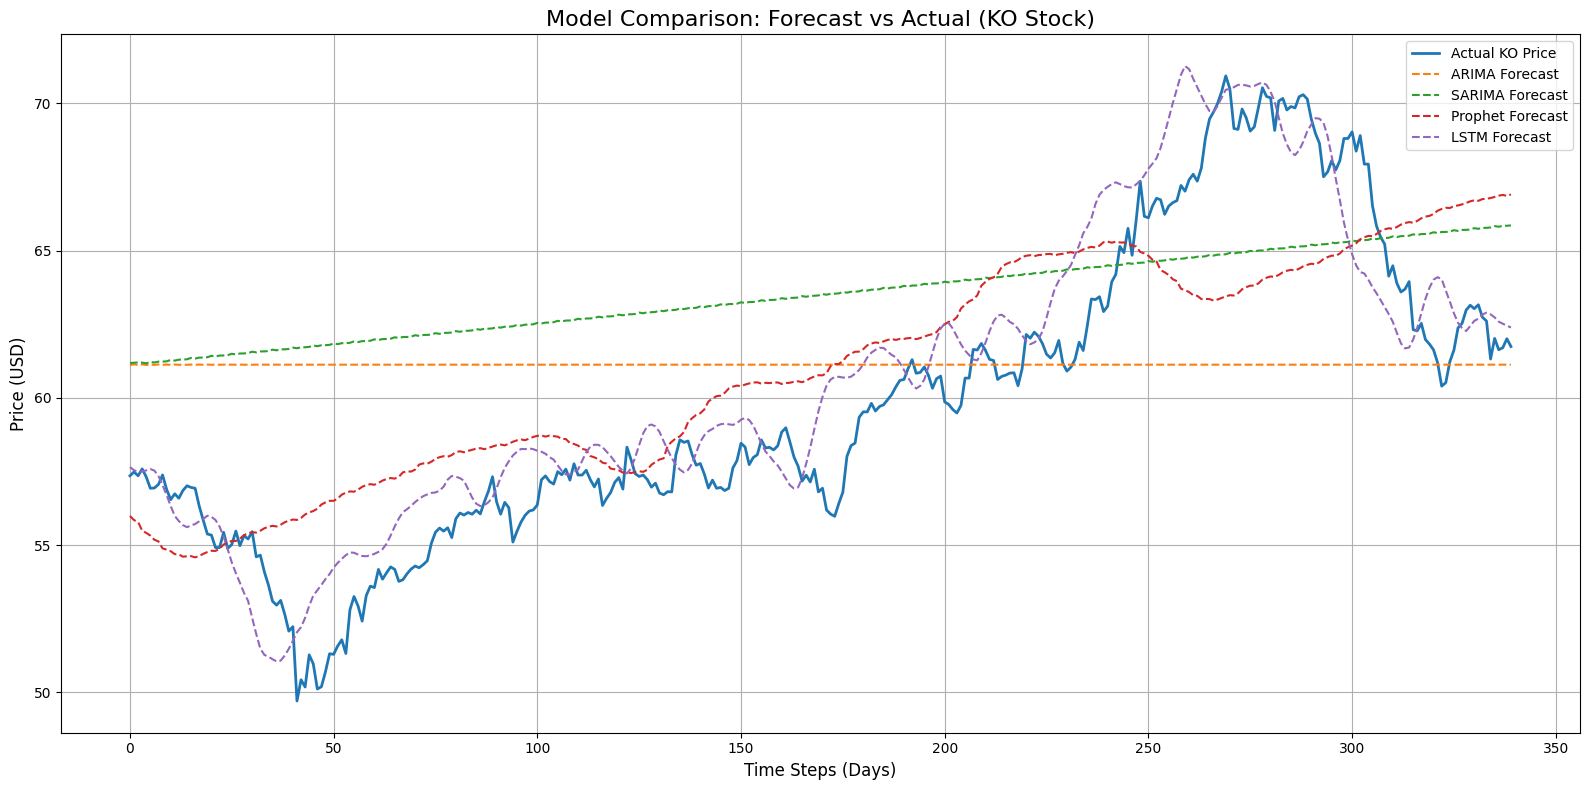

In [ ]:
import matplotlib.pyplot as plt

# Trim actual to match forecast lengths
actual = test_data[:len(pred_arima)]

# Trim predictions to match actual if needed
pred_lstm = pred_lstm[:len(actual)]
pred_prophet = pred_prophet[:len(actual)]
pred_sarima = pred_sarima[:len(actual)]

# Plot all predictions vs actual
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual KO Price', linewidth=2)

plt.plot(pred_arima, label='ARIMA Forecast', linestyle='--')
plt.plot(pred_sarima, label='SARIMA Forecast', linestyle='--')
plt.plot(pred_prophet, label='Prophet Forecast', linestyle='--')
plt.plot(pred_lstm, label='LSTM Forecast', linestyle='--')

plt.title('Model Comparison: Forecast vs Actual (KO Stock)', fontsize=16)
plt.xlabel('Time Steps (Days)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fine tuning the Models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Try (p,d,q) = (1,1,1) or tune manually
model = ARIMA(data['Close'], order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     KO   No. Observations:                 1760
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1509.130
Date:                Wed, 30 Jul 2025   AIC                           3024.260
Time:                        05:03:05   BIC                           3040.678
Sample:                             0   HQIC                          3030.327
                               - 1760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9272      0.035    -26.773      0.000      -0.995      -0.859
ma.L1          0.9507      0.031     30.552      0.000       0.890       1.012
sigma2         0.3256      0.005     61.206      0.000       0.315       0.336
===================================================================================
Ljung-Box (L1) (Q):                   3.89   Jarque-Bera (JB):              3682.09
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Try ARIMA(5,1,0) first (widely used default)
model_arima = ARIMA(data['Close'], order=(5,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

# Forecast for test length
pred_arima = model_arima_fit.forecast(steps=len(test_data)).values


                               SARIMAX Results                                
Dep. Variable:                     KO   No. Observations:                 1760
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1499.438
Date:                Wed, 30 Jul 2025   AIC                           3010.876
Time:                        05:03:19   BIC                           3043.711
Sample:                             0   HQIC                          3023.011
                               - 1760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0216      0.015     -1.408      0.159      -0.052       0.008
ar.L2          0.0412      0.014      2.918      0.004       0.014       0.069
ar.L3         -0.0335      0.014     -2.414      0.0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Try SARIMA(2,1,2)(1,0,1,5) — seasonality of 5 (weekly in stock)
model_sarima = SARIMAX(data['Close'],
                       order=(2,1,2),
                       seasonal_order=(1,0,1,5),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

model_sarima_fit = model_sarima.fit(disp=False)
print(model_sarima_fit.summary())

# Forecast for test length
pred_sarima = model_sarima_fit.forecast(steps=len(test_data)).values


                                      SARIMAX Results                                      
Dep. Variable:                                  KO   No. Observations:                 1760
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 5)   Log Likelihood               -1500.076
Date:                             Wed, 30 Jul 2025   AIC                           3014.152
Time:                                     05:03:29   BIC                           3052.428
Sample:                                          0   HQIC                          3028.301
                                            - 1760                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5030      0.318     -1.583      0.113      -1.126       0.120
ar.L2         -0.3835      

In [ ]:
from prophet import Prophet

# Prepare data
df_prophet = data[['Close']].reset_index()
df_prophet.columns = ['ds', 'y']

# Tune changepoint prior scale (controls flexibility)
model_prophet = Prophet(changepoint_prior_scale=0.15,
                        daily_seasonality=True,
                        yearly_seasonality=True)
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit
model_prophet.fit(df_prophet)

# Future prediction
future = model_prophet.make_future_dataframe(periods=len(test_data))
forecast = model_prophet.predict(future)

# Extract forecast values
pred_prophet = forecast['yhat'][-len(test_data):].values


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwvids_z/p_f_shzo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwvids_z/fm1n_qbk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32295', 'data', 'file=/tmp/tmpjwvids_z/p_f_shzo.json', 'init=/tmp/tmpjwvids_z/fm1n_qbk.json', 'output', 'file=/tmp/tmpjwvids_z/prophet_model7o7mtmvd/prophet_model-20250730050337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:03:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:03:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Model structure
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(units=100))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(units=1))

# Compile & train
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=60, batch_size=42, verbose=1)

# Predict
lstm_predictions = model_lstm.predict(X_test)
pred_lstm = scaler.inverse_transform(lstm_predictions).reshape(-1)


Epoch 1/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 0.0500
Epoch 2/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.0033
Epoch 3/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - loss: 0.0025
Epoch 4/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - loss: 0.0023
Epoch 5/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0022
Epoch 6/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - loss: 0.0024
Epoch 7/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0022
Epoch 8/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - loss: 0.0022
Epoch 9/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0017
Epoch 10/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0021
Epoch 11/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0018
Epoch 12/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - loss: 0.0021
Epoch 13/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0018
Epoch 14/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0020
Epoch 15/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step -

Final Evaluations

In [ ]:
def evaluate_model(actual, predicted):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import numpy as np
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return rmse, mae, mape

# Align all arrays to the same length
min_len = len(pred_lstm)
actual = test_data[:min_len]
pred_arima = pred_arima[:min_len]
pred_sarima = pred_sarima[:min_len]
pred_prophet = pred_prophet[:min_len]

metrics = {
    'ARIMA': evaluate_model(actual, pred_arima),
    'SARIMA': evaluate_model(actual, pred_sarima),
    'Prophet': evaluate_model(actual, pred_prophet),
    'LSTM': evaluate_model(actual, pred_lstm)
}

print(f"{'Model':<10} {'RMSE':<10} {'MAE':<10} {'MAPE (%)':<10}")
for model, (rmse, mae, mape) in metrics.items():
    print(f"{model:<10} {rmse:<10.4f} {mae:<10.4f} {mape:<10.2f}")

Model      RMSE       MAE        MAPE (%)  
ARIMA      5.2322     4.4128     7.47      
SARIMA     5.2241     4.4034     7.45      
Prophet    11.8661    11.4397    20.23     
LSTM       1.7185     1.3375     9.21      
